In [1]:
# El objetivo de destoe notebook es digerir los datos del dataset ExDark para poder 
# ser usados por YOLO

In [2]:
# El objetivo final es tener los datos de las siguiente manera:

# data/
# ├── images/
# │   ├── train/
# │   │   ├── img1.jpg
# │   │   ├── img2.jpg
# │   │   └── ...
# │   ├── val/
# │   │   ├── img101.jpg
# │   │   ├── img102.jpg
# │   │   └── ...
# │   └── test/
# │       ├── img201.jpg
# │       ├── img202.jpg
# │       └── ...
# ├── labels/
# │   ├── train/
# │   │   ├── img1.txt
# │   │   ├── img2.txt
# │   │   └── ...
# │   ├── val/
# │   │   ├── img101.txt
# │   │   ├── img102.txt
# │   │   └── ...
# │   └── test/
# │       ├── img201.txt
# │       ├── img202.txt
# │       └── ...
# ├── data.yaml





In [3]:
# Ademas, hay que modificar el etiquetado de los archivos de ExDark para que se ajusten a YOLO

# Formato de ExDark:
# (a) First 16 characters : Annotation tool data (unused)
# (b) 1st column : Object class name
# (c) 2nd-5th column : Bounding box coordinates [l t w h]

# l - pixel number from left of image
# t - pixel number from top of image
# w - width of bounding box
# h - height of bounding box

# (d) 6th-12th column : occlusion and orientation annotation (unused)
# (e) For images with more than 1 object annotated, (b)-(d) is repeated

# Formato de YOLO:
# <object-class> <x> <y> <width> <height>

In [4]:
# Ruta annotations
dir_annotations = '/home/david/vision_computador/entrega3/yolo/ExDark_Annno'

# Ruta imagenes
dir_images = '/home/david/vision_computador/entrega3/yolo/ExDark'

Contenido del archivo:
% bbGt version=3
Table 84 311 232 61 0 0 0 0 0 0 0
Chair 9 180 285 162 0 0 0 0 0 0 0



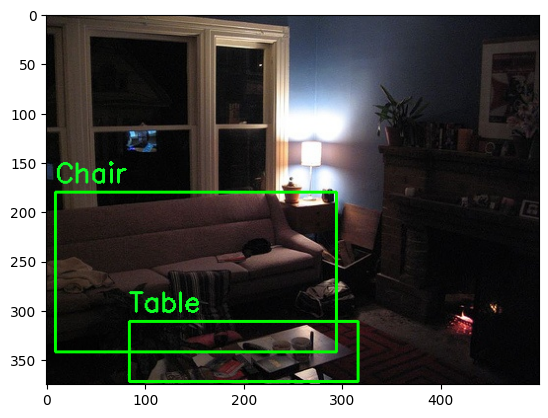

In [5]:
# Demo del formato de ExDark

# Cargar un archivo de anotaciones
file = dir_annotations + '/Table/2015_06852.jpg.txt'

print('Contenido del archivo:')
with open(file, 'r') as f:
    print(f.read())

# Dibujar bounding box en la imagen
import cv2
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread(dir_images + '/Table/2015_06852.jpg')

# Dibujar bounding box en nuestra imagen
with open(file, 'r') as f:
    # Ignorar la primera linea
    f.readline()
    for line in f:
        line = line.split()
        x, y, w, h = map(int, line[1:5])
        # Añadimos el Label
        cv2.putText(img, line[0], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar imagen
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Dar formato al etiquetado

In [6]:
# Funcion para leer las anotaciones de ExDark (ignorando la primera linea)
def read_exdark_annotations(file):
    with open(file, 'r') as f:
        # Ignorar la primera linea
        f.readline()
        lineas = []
        for line in f:
            lineas.append(line)
        return lineas

In [7]:
# Extraer las coordenadas de las anotaciones y la clase
def parse_exdark_line(line):
    parts = line.strip().split()
    object_class = parts[0]
    l = int(parts[1])
    t = int(parts[2])
    w = int(parts[3])
    h = int(parts[4])
    return object_class, l, t, w, h

In [8]:
# Convertir las coordenadas de ExDark a YOLO
labels = ['Bicycle', 'Boat', 'Bottle', 'Bus', 'Car', 'Cat', 'Chair', 'Cup', 'Dog', 'Motorbike', 'People', 'Table']

def convert_to_yolo_format(object_class, l, t, w, h, img_width, img_height):
    x_center = l + w / 2.0
    y_center = t + h / 2.0
    x_center /= img_width
    y_center /= img_height
    w /= img_width
    h /= img_height
    object_id = labels.index(object_class)
    return f"{object_id} {x_center} {y_center} {w} {h}"

In [9]:
# Guardar las anotaciones en formato YOLO
def save_yolo_annotations(yolo_annotations, output_file_path):
    with open(output_file_path, 'w') as file:
        for annotation in yolo_annotations:
            file.write(annotation + '\n')

In [10]:
# Convertir las anotaciones de ExDark a YOLO
def convert_exdark_to_yolo(input_file_path, output_file_path, img_width, img_height):
    lines = read_exdark_annotations(input_file_path)
    yolo_annotations = []
    for line in lines:
        object_class, l, t, w, h = parse_exdark_line(line)
        yolo_annotation = convert_to_yolo_format(object_class, l, t, w, h, img_width, img_height)
        yolo_annotations.append(yolo_annotation)
    save_yolo_annotations(yolo_annotations, output_file_path)

In [11]:
import os
from PIL import Image

def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# 1
input_file_path = './ExDark_Annno/Table/2015_06852.jpg.txt'
file_class = os.path.basename(os.path.dirname(input_file_path))
file_name = os.path.basename(input_file_path)
file_name = os.path.splitext(file_name)[0]
print("INput path: " + input_file_path)

# 2
output_directory = './test/'+ file_class
output_file_name = file_name + '.txt'
output_file_path = os.path.join(output_directory, output_file_name)
print("OUTput path: " + output_file_path)

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 3 y 4
input_image_path = './ExDark/Table/' + file_name
img_width = get_image_size(input_image_path)[0]  # Ancho de la imagen
img_height = get_image_size(input_image_path)[1]  # Alto de la imagen
print("Ancho de la imagen: " + str(img_width))
print("Alto de la imagen: " + str(img_height))

convert_exdark_to_yolo(input_file_path, output_file_path, img_width, img_height)

INput path: ./ExDark_Annno/Table/2015_06852.jpg.txt
OUTput path: ./test/Table/2015_06852.jpg.txt
Ancho de la imagen: 500
Alto de la imagen: 375


In [12]:
# Crear carpeta images duplicando la estructura de ExDark
import shutil

# Crear carpeta images
images_dir = './images_subcarpetas'

if os.path.exists(images_dir):
    shutil.rmtree(images_dir)

os.makedirs(images_dir)

# Copiar las imagenes de ExDark a la carpeta images
shutil.copytree('./ExDark', images_dir, dirs_exist_ok=True)

'./images_subcarpetas'

In [13]:
import os
from PIL import Image

def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# Ruta de las anotaciones
dir_annotations = '/home/david/vision_computador/entrega3/yolo/ExDark_Annno'

# Ruta de las imágenes
dir_images = '/home/david/vision_computador/entrega3/yolo/' + images_dir




for root, dirs, files in os.walk(dir_annotations):
    print("Procesando directorio: " + root)
    for file in files:
        if file.endswith('.txt'):
            # input_file_path
            input_file_path = os.path.join(root, file)

            # output_file_path
            file_class = os.path.basename(os.path.dirname(input_file_path))
            file_name_extension = os.path.splitext(file)[0]
            file_name = os.path.splitext(file_name_extension)[0]
            output_directory = os.path.join('./labels_subcarpetas', file_class)
            output_file_name = file_name + '.txt'
            
            output_file_path = os.path.join(output_directory, output_file_name)
            
            if not os.path.exists(output_directory):
                os.makedirs(output_directory)

            # img_width, img_height
            input_image_path = os.path.join(dir_images, file_class, file_name_extension)

            # Solucionar problema 2015_00391.JPG
            if not os.path.exists(input_image_path):
                input_image_path_Name = os.path.splitext(input_image_path)[0]
                reverse_Extension = os.path.splitext(input_image_path)[1].swapcase()
                input_image_path_fixed = input_image_path_Name + reverse_Extension
                print("Intentando con: " + input_image_path_fixed)
                if os.path.exists(input_image_path_fixed):
                    os.rename(input_image_path_fixed, input_image_path)
                    print(f"Renombrado {input_image_path_fixed} a {input_image_path}")
                else:
                    print("No se encontró la imagen: " + input_image_path)

            img_width, img_height = get_image_size(input_image_path)
    

            convert_exdark_to_yolo(input_file_path, output_file_path, img_width, img_height)
            
    
    


Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno
Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno/Car
Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno/People
Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno/Cup
Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno/Cat
Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno/Bicycle
Intentando con: /home/david/vision_computador/entrega3/yolo/./images_subcarpetas/Bicycle/2015_00391.JPG
Renombrado /home/david/vision_computador/entrega3/yolo/./images_subcarpetas/Bicycle/2015_00391.JPG a /home/david/vision_computador/entrega3/yolo/./images_subcarpetas/Bicycle/2015_00391.jpg
Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno/Bottle
Procesando directorio: /home/david/vision_computador/entrega3/yolo/ExDark_Annno/Boat
Procesando directorio: /home

Contenido del archivo:
11 0.4 0.9106666666666666 0.464 0.16266666666666665
6 0.303 0.696 0.57 0.432



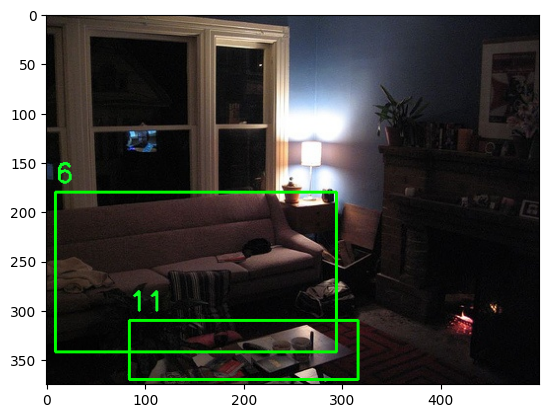

In [14]:
# Demo del formato de YOLO

dir_annotations = '/home/david/vision_computador/entrega3/yolo/labels_subcarpetas'
dir_images = '/home/david/vision_computador/entrega3/yolo/'+ images_dir

# Cargar un archivo de anotaciones
file = dir_annotations + '/Table/2015_06852.txt'

print('Contenido del archivo:')
with open(file, 'r') as f:
    print(f.read())

# Dibujar bounding box en la imagen
import cv2
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread(dir_images + '/Table/2015_06852.jpg')

# Dibujar bounding box en nuestra imagen
with open(file, 'r') as f:
    for line in f:
        line = line.split()
        x_center, y_center, w, h = map(float, line[1:5])
        x = int((x_center - w / 2) * img.shape[1])
        y = int((y_center - h / 2) * img.shape[0])
        w = int(w * img.shape[1])
        h = int(h * img.shape[0])
        # Añadimos el Label
        cv2.putText(img, line[0], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar imagen
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
print("Label 6 = " + labels[6])
print("Label 11 = " + labels[11])

Label 6 = Chair
Label 11 = Table


# Dividir en las carpetas correspondientes

Ya están las imagenes con el siguiente formato

`images/image1.jpg`  
`labels/image1.txt`

**Ahora hay que dividir en train val test** 

In [16]:
import random
import os
# A partir de la lista de imágenes de entrenamiento, obtener las anotaciones de la lista de anotaciones
def get_annotation_files(image_files):
    lista_anotaciones = []
    for image_name in image_files:
        prefijo = image_name.split('.')[0]
        annotation_name = prefijo + '.txt'
        lista_anotaciones.append(annotation_name)
    return lista_anotaciones

def dividir_datos(directorio_imagenes, proporcion_train=0.7, proporcion_val=0.2, proporcion_test=0.1):
    # Listar los archivos en los directorios
    lista_imagenes = os.listdir(directorio_imagenes)

    random.seed(42)
    random.shuffle(lista_imagenes)

    # Indices de los datos de entrenamiento, validación y prueba
    train_size = int(len(lista_imagenes) * proporcion_train)
    val_size = int(len(lista_imagenes) * proporcion_val)
    test_size = len(lista_imagenes) - train_size - val_size

    # Dividir los datos en entrenamiento, validación y prueba en 3 listas
    lista_imagenes_train = lista_imagenes[:train_size]
    lista_imagenes_val = lista_imagenes[train_size:train_size + val_size]
    lista_imagenes_test = lista_imagenes[train_size + val_size:]


    lista_anotaciones_train = get_annotation_files(lista_imagenes_train)
    lista_anotaciones_val = get_annotation_files(lista_imagenes_val)
    lista_anotaciones_test = get_annotation_files(lista_imagenes_test)

    # Verificar que coinciden las imágenes con las anotaciones
    for image_name, annotation_name in zip(lista_imagenes_train, lista_anotaciones_train):
        assert image_name.split('.')[0] == annotation_name.split('.')[0]

    for image_name, annotation_name in zip(lista_imagenes_val, lista_anotaciones_val):
        assert image_name.split('.')[0] == annotation_name.split('.')[0]

    for image_name, annotation_name in zip(lista_imagenes_test, lista_anotaciones_test):
        assert image_name.split('.')[0] == annotation_name.split('.')[0]

    datos_train = (lista_imagenes_train, lista_anotaciones_train)
    datos_val = (lista_imagenes_val, lista_anotaciones_val)
    datos_test = (lista_imagenes_test, lista_anotaciones_test)
    

    return datos_train, datos_val, datos_test

# Ejemplo de uso
directorio_og_imagenes = './images_subcarpetas/Cat/'

datos_train, datos_val, datos_test = dividir_datos(directorio_og_imagenes)


In [17]:
import shutil

def copy_files(image_files, annotation_files, source_image_dir, source_annotation_dir, dest_image_dir, dest_annotation_dir):
        for image_name, annotation_name in zip(image_files, annotation_files):
            image_source_path = os.path.join(source_image_dir, image_name)
            image_dest_path = os.path.join(dest_image_dir, image_name)
            
            annotation_source_path = os.path.join(source_annotation_dir, annotation_name)
            annotation_dest_path = os.path.join(dest_annotation_dir, annotation_name)

            shutil.copy(image_source_path, image_dest_path)
            shutil.copy(annotation_source_path, annotation_dest_path)

def create_and_copy_files(data_dir, datos_train, datos_val, datos_test, directorio_og_anotaciones):
    images_dir = os.path.join(data_dir, 'images')
    labels_dir = os.path.join(data_dir, 'labels')

    train_dir = os.path.join(images_dir, 'train')
    val_dir = os.path.join(images_dir, 'val')
    test_dir = os.path.join(images_dir, 'test')

    train_labels_dir = os.path.join(labels_dir, 'train')
    val_labels_dir = os.path.join(labels_dir, 'val')
    test_labels_dir = os.path.join(labels_dir, 'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(train_labels_dir, exist_ok=True)
    os.makedirs(val_labels_dir, exist_ok=True)
    os.makedirs(test_labels_dir, exist_ok=True)

    img_train, anot_train = datos_train
    img_val, anot_val = datos_val
    img_test, anot_test = datos_test

    copy_files(img_train, anot_train, directorio_og_imagenes, directorio_og_anotaciones, train_dir, train_labels_dir)
    copy_files(img_val, anot_val, directorio_og_imagenes, directorio_og_anotaciones, val_dir, val_labels_dir)
    copy_files(img_test, anot_test, directorio_og_imagenes, directorio_og_anotaciones, test_dir, test_labels_dir)


In [18]:
# Probar con el directorio de imágenes de gatos
data_dir = './data_gatos'
directorio_og_imagenes = './images_subcarpetas/Cat/'
directorio_og_anotaciones = './labels_subcarpetas/Cat/'

datos_train, datos_val, datos_test = dividir_datos(directorio_og_imagenes)
create_and_copy_files(data_dir, datos_train, datos_val, datos_test, directorio_og_anotaciones)

# Ha funcionado, ahora vamos a hacerlo con todas las clases

In [19]:
# Ahora es hacer lo mismo para todas las clases

# Crear directorio de datos
data_dir = './data'

# Iteramos sobre todas las carpetas de imagenes_subcarpetas
for root, dirs, files in os.walk('./images_subcarpetas'):
    if len(files) > 0:
        print("Procesando directorio: " + root)
        directorio_og_imagenes = root
        directorio_og_anotaciones = './labels_subcarpetas/' + os.path.basename(root)
        print("\tDirectorio de anotaciones: " + directorio_og_anotaciones)
        datos_train, datos_val, datos_test = dividir_datos(directorio_og_imagenes)
        create_and_copy_files(data_dir, datos_train, datos_val, datos_test, directorio_og_anotaciones)

Procesando directorio: ./images_subcarpetas/Car
	Directorio de anotaciones: ./labels_subcarpetas/Car
Procesando directorio: ./images_subcarpetas/People
	Directorio de anotaciones: ./labels_subcarpetas/People
Procesando directorio: ./images_subcarpetas/Cup
	Directorio de anotaciones: ./labels_subcarpetas/Cup
Procesando directorio: ./images_subcarpetas/Cat
	Directorio de anotaciones: ./labels_subcarpetas/Cat
Procesando directorio: ./images_subcarpetas/Bicycle
	Directorio de anotaciones: ./labels_subcarpetas/Bicycle
Procesando directorio: ./images_subcarpetas/Bottle
	Directorio de anotaciones: ./labels_subcarpetas/Bottle
Procesando directorio: ./images_subcarpetas/Boat
	Directorio de anotaciones: ./labels_subcarpetas/Boat
Procesando directorio: ./images_subcarpetas/Dog
	Directorio de anotaciones: ./labels_subcarpetas/Dog
Procesando directorio: ./images_subcarpetas/Table
	Directorio de anotaciones: ./labels_subcarpetas/Table
Procesando directorio: ./images_subcarpetas/Motorbike
	Directorio

In [20]:
import os

def verify_images_and_labels(images_dir, labels_dir):
    # Obtener los nombres de los archivos sin extensiones
    images = set(os.path.splitext(f)[0].lower() for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f)))
    labels = set(os.path.splitext(f)[0].lower() for f in os.listdir(labels_dir) if os.path.isfile(os.path.join(labels_dir, f)))

    # Encontrar las diferencias
    missing_labels = images - labels
    missing_images = labels - images

    # Imprimir los resultados
    if missing_labels:
        print("Faltan etiquetas para las siguientes imágenes:")
        for img in missing_labels:
            print(f"{img}")

    if missing_images:
        print("Faltan imágenes para las siguientes etiquetas:")
        for lbl in missing_images:
            print(f"{lbl}")

    if not missing_labels and not missing_images:
        print("Todas las imágenes tienen sus etiquetas correspondientes.")


verify_images_and_labels('./data/images/train', './data/labels/train')
verify_images_and_labels('./data/images/val', './data/labels/val')
verify_images_and_labels('./data/images/test', './data/labels/test')

Todas las imágenes tienen sus etiquetas correspondientes.
Todas las imágenes tienen sus etiquetas correspondientes.
Todas las imágenes tienen sus etiquetas correspondientes.
